In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import pickle

In [2]:
# Read the Excel file from the URL using pandas
df = pd.read_csv('./data/UCI_Credit_Card_modified.csv')
# ID column has no use, so lets drop it
df = df.drop('ID', axis=1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [12]:

# Define X and y using iloc
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]  # Select the last column as the target variable

In [31]:
df1 = pd.DataFrame(X, columns=['LIMIT_BAL',
                               'SEX',
                               'EDUCATION',
                               'MARRIAGE',
                               'AGE',
                               'PAY_0',
                               'PAY_2',
                               'PAY_3',
                               'PAY_4',
                               'PAY_5',
                               'PAY_6',
                               'BILL_AMT1',
                               'BILL_AMT2',
                               'BILL_AMT3',
                               'BILL_AMT4',
                               'BILL_AMT5',
                               'BILL_AMT6',
                               'PAY_AMT1',
                               'PAY_AMT2',
                               'PAY_AMT3',
                               'PAY_AMT4',
                               'PAY_AMT5',
                               'PAY_AMT6'])
df2 = pd.DataFrame(y, columns=['DEFAULT'])
final_df = pd.concat([df1, df2], axis=1)

In [34]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['LIMIT_BAL',
                                        'SEX',
                                         'EDUCATION',
                                         'MARRIAGE',
                                         'AGE',
                                         'PAY_0',
                                         'PAY_2',
                                         'PAY_3',
                                         'PAY_4',
                                         'PAY_5',
                                         'PAY_6',
                                         'BILL_AMT1',
                                         'BILL_AMT2',
                                         'BILL_AMT3',
                                         'BILL_AMT4',
                                         'BILL_AMT5',
                                         'BILL_AMT6',
                                         'PAY_AMT1',
                                         'PAY_AMT2',
                                         'PAY_AMT3',
                                         'PAY_AMT4',
                                         'PAY_AMT5',
                                         'PAY_AMT6']], final_df['DEFAULT'])

In [38]:
print(X.shape)
print(len(y[y == 0]))
print(len(y[y == 1]))

(46728, 23)
23364
23364


In [39]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [41]:
categorical_cols = ['SEX',
                    'EDUCATION',
                    'MARRIAGE',
                    'PAY_0',
                    'PAY_2',
                    'PAY_3',
                    'PAY_4',
                    'PAY_5',
                    'PAY_6']
numerical_cols = ['LIMIT_BAL',
                    'AGE',
                    'BILL_AMT1',
                    'BILL_AMT2',
                    'BILL_AMT3',
                    'BILL_AMT4',
                    'BILL_AMT5',
                    'BILL_AMT6',
                    'PAY_AMT1',
                    'PAY_AMT2',
                    'PAY_AMT3',
                    'PAY_AMT4',
                    'PAY_AMT5',
                    'PAY_AMT6']

In [42]:
## feature Engineering Automation
## Numerical Pipelines
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##Missing Values
        ('scaler',StandardScaler()) ## feature Scaling
        ]
    )

#categorical Pipeline
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')), ## handling Missing values
        ]
    )  


In [43]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])

In [44]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [45]:
## Model Training Automation
models={
    'Random Forest':RandomForestClassifier(),
    'XGBClassifier':XGBClassifier(),
    'SVC':SVC(),
    'IsolationForest' :IsolationForest(),
    'MLPClassifier' :MLPClassifier(activation='relu')

}

def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            

            
    return report




In [46]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.8420714744275626,
 'XGBClassifier': 0.8245238604750695,
 'SVC': 0.7558313717098224,
 'IsolationForest': 0.4559169698266638,
 'MLPClassifier': 0.7808688208859406}

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def evaluate_model(X_train, y_train, X_test, y_test, models, param_grids):
    report = {}

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, verbose=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_
        
        # Predict Testing data
        y_test_pred = best_model.predict(X_test)

        # Get accuracy for test data prediction
        test_model_score = accuracy_score(y_test, y_test_pred)

        report[model_name] = test_model_score
        
        # Print the best model's hyperparameters
        print(f"Best {model_name} Hyperparameters:")
        print(grid_search.best_params_)
        print("\n")

    return report


param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    'SVC': {
        'C': [1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'IsolationForest': {
        'contamination': [0.05, 0.1, 0.2],
        'n_estimators': [100, 200, 300]
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

report = evaluate_model(X_train, y_train, X_test, y_test, models, param_grids)

# Print the evaluation report
for model_name, accuracy in report.items():
    print(f"{model_name} Accuracy: {accuracy}")


Training Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.836 total time=  13.7s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.835 total time=  18.6s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.841 total time=  18.8s
[CV 5/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.830 total time=  18.9s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.836 total time=  23.3s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=200;, score=0.836 total time=  39.0s
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=200;, score=0.838 total time=  42.2s
[CV 2/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=0.834 total time=  19.9s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=200;, score=0.840 total time=  43.0s
[CV 1/5] END max_depth=None, min_samples_split=5, n_estimators=100;, score=0.828 total time=  24.5s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.0001, hidden_layer_sizes=(100,);, score=0.769 total time=  43.1s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.0001, hidden_layer_sizes=(100,);, score=0.779 total time=  47.5s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.0001, hidden_layer_sizes=(100,);, score=0.777 total time=  48.2s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.0001, hidden_layer_sizes=(100,);, score=0.775 total time=  53.0s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(100,);, score=0.781 total time=  48.1s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.0001, hidden_layer_sizes=(100, 100);, score=0.775 total time= 1.6min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.0001, hidden_layer_sizes=(100, 100);, score=0.772 total time= 1.7min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(100,);, score=0.777 total time=  53.9s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.0001, hidden_layer_sizes=(100, 100);, score=0.774 total time= 1.8min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.0001, hidden_layer_sizes=(100, 100);, score=0.776 total time= 2.0min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.0001, hidden_layer_sizes=(100, 100);, score=0.775 total time= 2.1min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(100,);, score=0.772 total time=  44.8s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(100,);, score=0.772 total time=  46.0s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(100,);, score=0.777 total time=  50.7s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100);, score=0.776 total time= 3.5min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100);, score=0.776 total time= 3.6min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100);, score=0.775 total time= 3.1min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100);, score=0.774 total time= 3.3min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(100, 100);, score=0.778 total time= 2.4min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(100, 100);, score=0.781 total time= 2.3min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(100, 100);, score=0.785 total time= 2.5min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.0001, hidden_layer_sizes=(100, 100, 100);, score=0.772 total time= 3.7min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.001, hidden_layer_sizes=(100, 100);, score=0.780 total time= 2.5min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(100,);, score=0.772 total time=  54.5s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(100, 100);, score=0.777 total time= 2.6min
[CV 4/5] END alpha=0.01, hidden_layer_sizes=(100,);, score=0.774 total time=  48.6s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(100,);, score=0.775 total time=  57.5s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(100,);, score=0.777 total time= 1.1min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(100,);, score=0.777 total time=  56.1s


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.001, hidden_layer_sizes=(100, 100, 100);, score=0.773 total time= 3.6min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.001, hidden_layer_sizes=(100, 100, 100);, score=0.777 total time= 3.9min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END alpha=0.01, hidden_layer_sizes=(100, 100);, score=0.777 total time= 2.6min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(100, 100);, score=0.775 total time= 2.3min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(100, 100);, score=0.780 total time= 2.3min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(100, 100);, score=0.787 total time= 2.8min
[CV 4/5] END alpha=0.001, hidden_layer_sizes=(100, 100, 100);, score=0.774 total time= 4.0min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.001, hidden_layer_sizes=(100, 100, 100);, score=0.767 total time= 3.9min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.001, hidden_layer_sizes=(100, 100, 100);, score=0.769 total time= 4.3min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END alpha=0.01, hidden_layer_sizes=(100, 100);, score=0.780 total time= 2.9min
[CV 1/5] END alpha=0.01, hidden_layer_sizes=(100, 100, 100);, score=0.770 total time= 3.2min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END alpha=0.01, hidden_layer_sizes=(100, 100, 100);, score=0.777 total time= 3.5min
[CV 3/5] END alpha=0.01, hidden_layer_sizes=(100, 100, 100);, score=0.770 total time= 2.7min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END alpha=0.01, hidden_layer_sizes=(100, 100, 100);, score=0.780 total time= 1.9min


/home/milan/anaconda3/envs/ml/lib/python3.10/site-packages/scikit_learn-1.2.2-py3.10-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END alpha=0.01, hidden_layer_sizes=(100, 100, 100);, score=0.774 total time= 3.0min
Best MLPClassifier Hyperparameters:
{'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}


Random Forest Accuracy: 0.8445324202867537
XGBClassifier Accuracy: 0.8341536486197304
SVC Accuracy: 0.7778728867964905
IsolationForest Accuracy: 0.4754975390541408
MLPClassifier Accuracy: 0.7826877808688208


In [50]:
# As we can see the best model is Random forest with hyper parameters.

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4664
           1       0.86      0.82      0.84      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



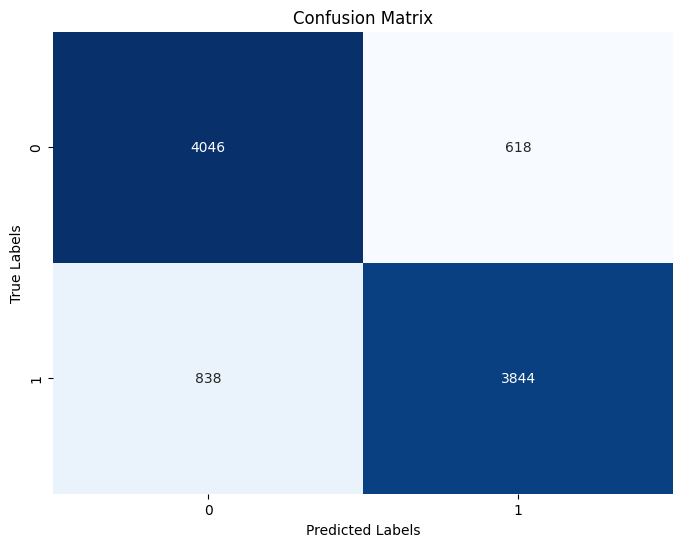

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new Random Forest model with the best parameters
rf_model = RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 200)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
